# Анализ и проверка гипотез по данным личного аккаунта сети Untappd

Данный проект изначально был предназначен для тренировки и отработки навыков работы с python, pandas, jupyter notebook и со всеми теми знаниями, что я получал в процессе учёбы. К тому же было достаточно интересно, даже с обыкновенной описательной точки зрения, получить сводку цифр, связанных с собой, и постараться найти причины их локальных состояний.

Впоследствии появилась идея о том, что и этот "блокнот" может войти в моё портфолио. К тому же я продолжаю им пользоваться, обновляя данные, поэтому решение привести его в надлежащий вид я нахожу правильным.

### 18+

Немного информации. Untappd - социальная сеть для биргиков. Биргики - слово, легко разбивающееся на два безо всяких специально написанных функций. С развитием пивного бизнеса, его брендированием под "ремесло", его упрощением, приобретением навыков низкоалкогольного напитка, доступного, трендового и чуть менее вредного для молодёжи, "тапок", как его ласково называют путешественники по барам, оказался как нельзя кстати. Он помогает: напиткам - продаваться, барам - развиваться, людям - коммуницировать, моде - быть самой собой. 

Минздрав, конечно, будет против, но этот прожект останется без критического взгляда.

Потому что для моего интереса к статистическим сводкам, начавшегося с увлечения спортом, "тапок" оказался элементом игры в чекины. Иначе говоря, "набиванием статы". 

Так приятно смотреть на таблички.

Untappd содержит карточки пива и пивоварен, а также имеет профайлы баров и пользователей. С помощью него можно обнаружить пиво, прочитать его характеристики или же узнать, где оно продаётся. Но самое главное - его можно оценить.
Внесение оценки состоит из привычных действий: комментарии, фотографии, отметка места, оценки, тегированный вкусовой профиль, друзья, которые пробовали очередной сорт вместе с тобой, лайки, именуемые тостами.
В общем, ничего сложного в функционировании приложения нет.

Зато сколько после него статистики! 

Основная статистика доступна в приложении. Всегда можно посмотреть сводную таблицу по стилям или странам, например. Можно платить за небольшую месячную подписку, с которой получать чуть больший функционал, в том числе и аккуратные временные графики. 

А можно и сделать запрос на всю-всю-всю сборку твоих действий. Он-то и будет нашим датасетом.

#### Задачи и направления

В данном прожекте основой будет описательная статистика, за которой я продолжаю наблюдать и которая может неким образом охарактеризовать меня. Это и можно назвать целью.

Также будут построены графики для наглядности и тренировки с их функционалом. Кроме того, в прожекте блок будет отдан на откуп попытки проверки статистических гипотез.

Получится или нет? Очень скоро узнаем.

А теперь к делу!

In [1]:
#import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from scipy import stats
%matplotlib inline

In [2]:
#open dataset

checkins = pd.read_csv('beer_december_seventh.csv')

## 1. Обзор датасета.

"Откроем" датасет, посмотрим на данные, которые в нём хранятся, посмотрим на его форму и выведем первые/последние записи.

In [3]:
checkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5469 entries, 0 to 5468
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_name                     5469 non-null   object 
 1   brewery_name                  5469 non-null   object 
 2   beer_type                     5469 non-null   object 
 3   beer_abv                      5469 non-null   float64
 4   beer_ibu                      5469 non-null   int64  
 5   comment                       5360 non-null   object 
 6   venue_name                    5223 non-null   object 
 7   venue_city                    4771 non-null   object 
 8   venue_state                   5153 non-null   object 
 9   venue_country                 5223 non-null   object 
 10  venue_lat                     5223 non-null   float64
 11  venue_lng                     5223 non-null   float64
 12  rating_score                  5411 non-null   float64
 13  cre

In [4]:
#многовато сортов даже за шесть лет

checkins.shape

(5469, 32)

In [5]:
checkins.head()

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
0,Hentai,AF Brew,IPA - American,5.9,50,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,Bottle,194363403,678907,38368,NaN,3.72,3.72,NaN,0,0
1,HopHead Double IPA,AF Brew,IPA - Imperial / Double,8.5,140,NaN,NaN,NaN,NaN,NaN,...,NaN,194363542,836456,38368,NaN,4.22,3.96,NaN,0,0
2,Chimay Grande Réserve (Blue),Bières de Chimay,Belgian Strong Dark Ale,9.0,35,NaN,NaN,NaN,NaN,NaN,...,NaN,194363634,34039,378,NaN,3.92,3.92,NaN,1,0
3,Chocolate Stout,Knightberg,Stout - Other,5.0,17,NaN,NaN,NaN,NaN,NaN,...,NaN,194363695,1105285,12920,NaN,3.77,3.76,NaN,0,0
4,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,Bottle,194363744,983516,82343,NaN,3.99,3.85,NaN,1,0


In [6]:
checkins.tail()

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
5464,Green Devil IPA,Oakham Ales,IPA - American,6.0,60,Как сексуально активный лепрекон - подмял под ...,Craft Beer Shop,Санкт-Петербург,Санкт-Петербург,Россия,...,Bottle,1114556681,127729,931,https://untappd.s3.amazonaws.com/photos/2021_1...,3.71,3.71,NaN,12,0
5465,MaCheTe In BUKHara Ver 2 (МаЧеТе в БУХаре),Rising Moon Brewery,Sour - Other Gose,6.2,0,"Клинок в животе - признак успокоения. Раз, два...",Craft Beer Shop,Санкт-Петербург,Санкт-Петербург,Россия,...,Can,1114592308,4598762,337614,https://untappd.s3.amazonaws.com/photos/2021_1...,4.15,3.75,Дядя Вася,12,0
5466,TURN [Pineapple+Mint],4BREWERS,Sour - Fruited Berliner Weisse,4.5,0,Тестерок - это белые лошадки.,Craft Beer Shop,Санкт-Петербург,Санкт-Петербург,Россия,...,Taster,1114595800,4287071,188442,NaN,4.12,4.07,NaN,10,0
5467,Евпатий / Квас для окрошки,Hmeleff (Хмелефф),Kvass,1.2,0,Вышел ночью в поле с конём. Конь под утро верн...,Untappd at Home,NaN,Everywhere,United States,...,Bottle,1114619487,4381731,32554,NaN,0.00,3.56,NaN,9,0
5468,Goldstar Dark Lager (גולדסטאר),Tempo Beer Industries Ltd (טמפו),Lager - Vienna,4.9,0,"Мамка Хесуса была такая толстая, что в реально...",Untappd at Home,NaN,Everywhere,United States,...,Can,1114816564,20744,5830,https://untappd.s3.amazonaws.com/photos/2021_1...,3.14,3.15,NaN,0,0


## 2. Форматирование некоторых данных, которое потребуется в работе

В этом разделе "складируются" некоторые фазы клининга, которые требуются для работы. В частности:

- форматируется время;
- удаляются дубликаты (неуникальное пиво и случайные повторы в таблице);
- удаляются строки с отсуствующей выставленной оценкой;
- переименовываются длинные названия в чекинах.

In [7]:
#перевод столбца в тип datetime

checkins['created_at'] = pd.to_datetime(checkins['created_at'])

In [8]:
#определение дней недели

checkins['weekdays'] = checkins['created_at'].dt.dayofweek
checkins['weekdays'].value_counts()

4    1197
5     931
3     748
2     687
0     682
6     616
1     608
Name: weekdays, dtype: int64

In [9]:
#переименование длинных наименований

checkins = checkins.replace({'Остановка «Светлановский просп. / просп. Тореза»':'Ост. «Светлановский/Тореза»'})

In [10]:
#удаление дублированных чекинов (сорта, которые я пробовал несколько раз)
che = checkins.copy()
che[che.duplicated(subset = ['beer_name', 'brewery_name', 'beer_abv'])]

che[che['beer_name'] == 'Urizen']

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments,weekdays
4,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,194363744,983516,82343,NaN,3.99,3.85,NaN,1,0,4
72,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,Разлив в марте пятняшки. Теперь полностью из х...,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,264434131,983516,82343,https://untappd.s3.amazonaws.com/photo/2016_01...,3.99,3.85,NaN,1,0,3
2672,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,Бутылка от марта 2015. На этот раз от хрена ни...,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,829473732,983516,82343,NaN,3.99,3.85,NaN,13,0,4


In [11]:
checkins_drop = che.drop_duplicates(subset = ['beer_name', 'brewery_name', 'beer_abv'])
checkins_drop[checkins_drop['beer_name'] == 'Urizen']

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,...,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments,weekdays
4,Urizen,Victory Art Brew,Belgian Tripel,10.5,28,NaN,Uchitelskaya Street (Учительская улица),Санкт-Петербург,Санкт-Петербург,Россия,...,194363744,983516,82343,NaN,3.99,3.85,NaN,1,0,4


In [12]:
#копия датасета с удалёнными строками, в которых отсутствовала оценка

checkins_drop_notnan = checkins_drop.copy()
checkins_drop_notnan = checkins_drop_notnan.dropna(subset = ['rating_score'])

## 3. Описательная статистика

Раздел, ради которого всё затевалось. В нём будут синтезированы некоторые интересующие меня показатели, которые раскрывают палитру интересов к пивному напитку.

Будут описаны следующие показетели (колонки датасета):

- **rating_score** - персональные оценки
- **global_weighted_rating_score** - взвешенные средние оценки пользователей для попробованного сорта
- **beer_type** - стили пива
- **brewery_name** - наименование пивоварни
- **brewery_country** - страна, которой пивоварня принадлежит
- **total_toasts** - количество лайков за чекин пива
- **venue_name** - название места, где пиво было попробовано
- **tagged_friends** - люди, которые пробовали сорт вместе со мной
- **comments** - персональный текст, которым был описан сорт

#### #Ключевые показатели распределения оценок

In [13]:
#ключевые показатели персональных оценок 

checkins['rating_score'].describe()

count    5411.000000
mean        3.640436
std         0.424163
min         0.500000
25%         3.500000
50%         3.750000
75%         3.900000
max         5.000000
Name: rating_score, dtype: float64

In [14]:
#ключевые показатели взвешенных средних оценок пользователей

checkins['global_weighted_rating_score'].describe()

count    5469.000000
mean        3.710823
std         0.286895
min         0.840000
25%         3.600000
50%         3.750000
75%         3.880000
max         4.570000
Name: global_weighted_rating_score, dtype: float64

#### #Гайд по стилям пива

Для меня основным статистическим и дегустационным параметром являются стили пива. Безусловно, стиль - глава "большого крафтового города", ответственный за разнообразие. В этот же момент, разнообразие - глава "большого крафтового государства", ответственный за интерес к потреблению. 

Отсутствие разницы между стилями убило бы весь интерес. А так как пивной продукт, как и всё в жизни, подвержен эволюции, то убийства не происходит. 

In [15]:
#стили пива, их распределение по количеству и средним персональным/взвешенным средним общим оценкам (не менее 10 чекинов на стиль)

checkins['beer_type'].value_counts()

IPA - American                      286
Sour - Other Gose                   273
Sour - Fruited                      223
IPA - New England / Hazy            219
Sour - Fruited Gose                 193
                                   ... 
Farmhouse Ale - Bière de Coupage      1
Mumme                                 1
Pilsner - Italian                     1
Farmhouse Ale - Bière de Mars         1
Kentucky Common                       1
Name: beer_type, Length: 223, dtype: int64

In [16]:
#стили пива, в которых у меня попробовано менее 10 сортов

checkins_drop['beer_type'].value_counts()[checkins_drop['beer_type'].value_counts() < 10]

Stout - English                     9
Red Ale - Irish                     9
Cider - Graff                       9
Brown Ale - American                9
Farmhouse Ale - Sahti               9
                                   ..
Farmhouse Ale - Bière de Coupage    1
Mumme                               1
Pilsner - Italian                   1
Mild - Dark                         1
Kentucky Common                     1
Name: beer_type, Length: 92, dtype: int64

In [17]:
#лучшие стили пива по моей оценке (попробовано не менее 10 сортов)

avg_beer_type = checkins_drop.groupby('beer_type')['rating_score']
avg_beer_type.mean()[(avg_beer_type.size() >= 10)].sort_values(axis=0, ascending=False)

beer_type
Lambic - Gueuze                     4.084091
Freeze-Distilled Beer               4.075000
Stout - Imperial / Double Coffee    4.028571
Lambic - Fruit                      4.018182
Chilli / Chile Beer                 3.914583
                                      ...   
Pilsner - Other                     3.030000
Lager - Amber                       3.018182
Non-Alcoholic Beer                  2.935294
Lager - Pale                        2.877451
Lager - Strong                      2.855000
Name: rating_score, Length: 131, dtype: float64

In [18]:
#лучшие стили пива, присутвующие в датасете, по средне взвещанной мировой оценке (попробовано не менее 10 сортов)

global_avg_beer_type = checkins_drop.groupby('beer_type')['global_weighted_rating_score']
global_avg_beer_type.mean()[(global_avg_beer_type.size() >= 10)].sort_values(axis=0, ascending=False)

beer_type
Stout - Imperial / Double Coffee    4.140000
Stout - Imperial / Double Pastry    4.022453
Lambic - Framboise                  4.016364
Sour - Smoothie / Pastry            3.997534
IPA - Triple New England / Hazy     3.995000
                                      ...   
Lager - American Light              3.194545
Lager - Pale                        3.148529
Lager - American                    3.118571
Lager - Strong                      3.000000
Non-Alcoholic Beer                  2.961714
Name: global_weighted_rating_score, Length: 131, dtype: float64

#### #Гайд по странам

Как мы узнавали географию по футболу и иным видам спорта, так сейчас в сознании созданы слоты для географии пивной. В настоящем подразделе, аналогично предыдущему, содержатся наиболее часто зачекиненные государства-производители со средней оценкой.

In [19]:
#страны, чьё производство я пробовал

checkins['brewery_country'].value_counts().head(20)

Russia            3238
United States      357
Belgium            293
Germany            233
England            152
Netherlands        125
Estonia            105
Denmark             95
Scotland            92
Spain               92
Sweden              89
Norway              81
Belarus             64
Italy               59
Czech Republic      52
Finland             47
Latvia              36
Lithuania           36
Moldova             30
Poland              27
Name: brewery_country, dtype: int64

In [73]:
checkins['brewery_country'].unique()

array(['Russia', 'Belgium', 'Scotland', 'Netherlands', 'United States',
       'Norway', 'Poland', 'Latvia', 'Denmark', 'Spain', 'Estonia',
       'Italy', 'England', 'Finland', 'Germany', 'Moldova', 'Serbia',
       'Japan', 'Sweden', 'Ireland', 'Wales', 'Armenia', 'Belarus',
       'Czech Republic', 'Georgia', 'Mexico', 'Aland Islands', 'France',
       'Iceland', 'Austria', 'Singapore', 'Lithuania', 'Ukraine',
       'Azerbaijan', 'Turkey', 'Hungary', 'Canada', 'Argentina',
       'Costa Rica', 'Greece', 'Switzerland', 'Romania', 'Portugal',
       "China / People's Republic of China", 'New Zealand', 'South Korea',
       'Philippines', 'Thailand', 'Australia', 'Jamaica', 'Vietnam',
       'Indonesia', 'Kazakhstan', 'Northern Ireland', 'Kyrgyzstan',
       'Slovakia', 'Israel'], dtype=object)

In [20]:
#лучшие государства-производители пива по моей оценке (попробовано не менее 20 сортов)

avg_country_score = checkins_drop.groupby('brewery_country')['rating_score']
avg_country_score.mean()[(avg_country_score.size() >= 20)].sort_values(axis=0, ascending=False)

brewery_country
Norway            3.810625
United States     3.798286
Belgium           3.774727
Sweden            3.752874
Italy             3.743966
Denmark           3.727473
Netherlands       3.674390
Russia            3.649606
Spain             3.646739
Scotland          3.644828
Estonia           3.635204
Belarus           3.612500
France            3.556250
England           3.538000
Finland           3.504444
Germany           3.369595
Ireland           3.330952
Poland            3.314583
Czech Republic    3.283000
Moldova           3.267241
Lithuania         3.165278
Latvia            3.129412
Name: rating_score, dtype: float64

In [21]:
#лучшие государства-производители пива из присутствующих в датасете, по средней взвешенной мировой оценке (попробовано не менее 20 сортов)

avg_country_global_score = checkins_drop.groupby('brewery_country')['global_weighted_rating_score']
avg_country_global_score.mean()[(avg_country_global_score.size() >= 20)].sort_values(axis=0, ascending=False)

brewery_country
United States     3.808725
Belarus           3.796250
Russia            3.776801
Norway            3.756420
Sweden            3.727955
Spain             3.692717
Belgium           3.689565
Italy             3.662373
Denmark           3.656702
France            3.622917
Netherlands       3.621920
Scotland          3.610444
Estonia           3.603173
Moldova           3.587000
England           3.585563
Ireland           3.567826
Poland            3.398148
Germany           3.393393
Czech Republic    3.368800
Finland           3.322667
Latvia            3.308235
Lithuania         3.225556
Name: global_weighted_rating_score, dtype: float64

In [22]:
#соединим таблицы в один датасет

countries_mine = avg_country_score.mean()[(avg_country_score.size() >= 20)]
countries_global = avg_country_global_score.mean()[(avg_country_global_score.size() >= 20)]
avg_countries_scores = pd.merge(left=countries_mine, right=countries_global, on='brewery_country')

In [23]:
# найдём разницу между выставляемыми мной оценками и между оценками, которые ставят в целом

avg_countries_scores['difference'] = avg_countries_scores.rating_score - avg_countries_scores.global_weighted_rating_score
avg_countries_scores.head()

,rating_score,global_weighted_rating_score,difference
brewery_country,,,
Belarus,3.612500,3.796250,-0.183750
Belgium,3.774727,3.689565,0.085162
Czech Republic,3.283000,3.368800,-0.085800
Denmark,3.727473,3.656702,0.070770
England,3.538000,3.585563,-0.047563


In [24]:
#отсортируем и посмотрим за восхвалением и предвзятостью

avg_countries_scores.difference.sort_values(ascending=False)

brewery_country
Finland           0.181778
Belgium           0.085162
Italy             0.081593
Denmark           0.070770
Norway            0.054205
Netherlands       0.052470
Scotland          0.034383
Estonia           0.032031
Sweden            0.024919
United States    -0.010439
Germany          -0.023798
Spain            -0.045978
England          -0.047563
Lithuania        -0.060278
France           -0.066667
Poland           -0.083565
Czech Republic   -0.085800
Russia           -0.127195
Latvia           -0.178824
Belarus          -0.183750
Ireland          -0.236874
Moldova          -0.319759
Name: difference, dtype: float64

Я считаю лучшими ***Норвегию, Соединённые Штаты и Бельгию*** по части варки пива. По тем же сортам мировой консенсус сходится на ***США, Белоруссии и России***. К сожалению, мой профиль, как выборка, слишком географически субъективен.

Что же касается выставления оценок, то куда лучшие котировки для меня имеют ***Финские*** производители. Суровее всего, по сравнению с остальными, я отношусь к ***Латвии, Белоруссии, Ирландии и Молдове***.

#### #Гайд по пивоварням

Конечно же нельзя обойти стороной и пивоварни - напрямую ответственные за результат и за восприятие. Углубляться не будем, посмотрим только количество потреблённых сортов и средние оценки. 

Используем дасасет только с уникальными чекинами.

In [25]:
#пивоварни, чьё производство я пробовал

checkins_drop['brewery_name'].value_counts().head(15)

AF Brew                189
Salden's Brewery       177
Zagovor Brewery        148
Bakunin Brewing Co.    147
Big Village Brewery    146
Stamm Brewing          102
Red Button Brewery      75
DIETA / ДИЕТА           73
Wild Lab                68
Hophead Brewery         62
Jaws Brewery            61
BrewDog                 61
OSTROVICA               57
Selfmade Brewery        57
4BREWERS                53
Name: brewery_name, dtype: int64

In [26]:
#лучшие пивоварни по моим оценкам (зачекинено не менее 25 сортов)

avg_brewery_score = checkins_drop_notnan.groupby('brewery_name')['rating_score']
avg_brewery_score.mean()[(avg_brewery_score.size() >= 25)].sort_values(axis=0, ascending=False).head(15)

brewery_name
Brouwerij Alvinne                  4.001923
Evil Twin Brewing                  3.942593
DIETA / ДИЕТА                      3.939041
Plague Brew                        3.855405
Stamm Brewing                      3.824510
Founders Brewing Co.               3.821875
Red Rocket Brewery                 3.811538
To Øl                              3.801724
Big Village Brewery                3.801027
Wild Lab                           3.792647
Zagovor Brewery                    3.792568
Brewlok Brewery                    3.783333
Brouwerij de Molen                 3.782927
Anderson Valley Brewing Company    3.780357
Omnipollo                          3.767241
Name: rating_score, dtype: float64

In [27]:
#лучшие пивоварни по средне взвешенным оценкам (зачекинено не менее 25 сортов)

avg_brewery_global_score = checkins_drop_notnan.groupby('brewery_name')['global_weighted_rating_score']
avg_brewery_global_score.mean()[(avg_brewery_score.size() >= 25)].sort_values(axis=0, ascending=False).head(15)

brewery_name
Founders Brewing Co.    3.975938
DIETA / ДИЕТА           3.973014
Zagovor Brewery         3.971824
Stamm Brewing           3.956863
Wild Lab                3.906765
Brewlok Brewery         3.901042
Big Village Brewery     3.893425
Brouwerij Alvinne       3.889615
Selfmade Brewery        3.882982
Red Rocket Brewery      3.866923
AF Brew                 3.865798
Rewort Brewery          3.855641
4BREWERS                3.853077
Hophead Brewery         3.843548
Plan B Brewery          3.835000
Name: global_weighted_rating_score, dtype: float64

Кроме непосредственной оценки продукта пивоварни, можно посмотреть, насколько эти пивоварни оцениваются тостами моих друзей. Для этого потренируем ***pivot_table*** и ***merge***.

In [28]:
#получаем сводные таблицы по пивоварням в сочетании с количеством тостов и количеством попровобованных сортов

brewery_toasts_pivot1 = checkins.pivot_table(aggfunc='sum', index='brewery_name', values='total_toasts', margins=True)
brewery_toasts_pivot2 = checkins.pivot_table(aggfunc='count', index='brewery_name', values='beer_abv', margins=True)
brewery_toasts = brewery_toasts_pivot1.merge(brewery_toasts_pivot2, on='brewery_name', how='inner')
brewery_toasts.rename(columns={'beer_abv':'counts'}, inplace=True)
brewery_toasts

,total_toasts,counts
brewery_name,,
Pub 102,8,1
"0,5 Pub",8,1
084Brewery,42,3
12 Acres Brewing Company,15,1
13 Litar,12,1
...,...,...
Хадыженский Пивзавод,14,1
Царскосельская Сидрерия,18,1
Частная Пивоварня Дорошенко,33,4


In [29]:
#вычисляем среднее количество тостов на пивоварню

brewery_toasts['toast_per_brewery'] = brewery_toasts.total_toasts/brewery_toasts.counts
brewery_toasts[brewery_toasts['counts'] > 10].toast_per_brewery.sort_values(ascending=False).head(10)

brewery_name
Cosmic City                 17.866667
Privatbrauerei Eichbaum     16.684211
Rising Moon Brewery         16.478261
Пивная Диета (Beer Diet)    16.055556
Brew Fiction                16.000000
DIETA / ДИЕТА               15.671233
COVEN BREWERY               15.461538
BrewT!                      15.416667
Courage Brewery             15.307692
Hophead Brewery             15.236842
Name: toast_per_brewery, dtype: float64

***Cosmic City*** в этом плане определённо на самой пиковой точке.

 #### #Немного о лагерах и пилзнерах

Для интереса приведём ещё некоторую описательную статистику, которая могла бы порадовать любого биргика. Затронем лагера, пилзнеры и пшеничку, как элемент "чистоты" среди многочисленных экспериментов.

Определим страны и пивоварни, кто лучше всех может почувствовать "классику". Опять же, всё на взгляд автора.

In [30]:
#распределение оценок для "классики"
lag_pils = checkins_drop[checkins_drop['beer_type'].str.contains('Lager|Pilsner|Hefeweizen')]
lag_pils['rating_score'].value_counts(bins=8, normalize=True)*100

(3.188, 3.625]    33.760684
(2.75, 3.188]     24.358974
(3.625, 4.062]    17.735043
(2.312, 2.75]     13.675214
(1.875, 2.312]     5.982906
(4.062, 4.5]       2.136752
(1.438, 1.875]     0.854701
(0.995, 1.438]     0.641026
Name: rating_score, dtype: float64

In [31]:
#лучшие пивоварни, способные варить "классику" (не менее 4 чекинов на пивоварню)

brewery_lager_score = lag_pils.groupby('brewery_name')['rating_score']
brewery_lager_score.mean(True)[(brewery_lager_score.size() >= 4)].sort_values(axis=0, ascending=False)

brewery_name
Пивоварня Одна тонна / Odna Tonna Brewery                    4.070000
Пивная Диета (Beer Diet)                                     3.940000
Velka Morava                                                 3.804545
Stamm Brewing                                                3.692857
AF Brew                                                      3.675000
Ayinger Privatbrauerei                                       3.600000
Salden's Brewery                                             3.585714
OSTROVICA                                                    3.575000
Jaws Brewery                                                 3.510000
Kulmbacher Brauerei                                          3.260000
Tradiční pivovar v Rakovníku                                 3.187500
Buket Chuvashii (Букет Чувашии)                              3.183333
Spaten-Franziskaner-Löwenbräu-Gruppe                         3.150000
Privatbrauerei Eichbaum                                      3.033333
Moscow 

In [32]:
#лучшие страны, чьи пивоварни способны варить "классику" (не менее 10 чекинов на пивоварню)

country_lager_score = lag_pils.groupby('brewery_country')['rating_score']
country_lager_score.mean()[(country_lager_score.size() >= 10)].sort_values(axis=0, ascending=False)

brewery_country
United States     3.452632
Russia            3.305523
Germany           3.210526
Czech Republic    3.146296
Netherlands       3.122727
Moldova           3.083333
Lithuania         3.046429
Latvia            2.833333
Name: rating_score, dtype: float64

#### #Пройдёмся по заведениям

Безусловно, интерес могут представлять и заведения. Конечно, статистика оценок в заведении не может являться фактором, определяющим решение о посещении. Тем не менее, в некоторых из них оценки выставляются лучше. 

Оговоримся, что описательная статистика не выявляет причины. И можно лишь догадываться, был ли бармен настолько хорош, что мне понравилось всё, что мы с ним попробовали. 

Посмотрим на средние персональные, средние взвешенные общие, а также дополнительно выясним, в каком баре я оставляю самые длинные комментарии в чекинах. Здесь причина более очевидна - при бармене и друзьях написать длинный комментарий невозможно.

In [33]:
#средние персональные оценки пиву в заведениях (не менее 20 чекинов в заведении)

avg_venue_score = checkins_drop.groupby('venue_name')['rating_score']
avg_venue_score.mean()[(avg_venue_score.size() >= 20)].sort_values(axis=0, ascending=False).head(25)

venue_name
AF Brew Taproom                    3.893333
Avrora Bar                         3.881818
TOP HOPS                           3.845946
Лободэй 2021                       3.820000
Beer Diet (Пивная Диета)           3.819159
Old Skull Fest                     3.811957
Share House                        3.797222
RULE taproom                       3.791892
Spontan                            3.791690
Beergeek Craft Beer Bar & Store    3.790190
Redrum Bar                         3.787705
Баланс белого                      3.787209
St.Petersburg Craft Event          3.762121
Fillin'Good                        3.757172
Big Craft Day 2019 у моря          3.750538
Jawsspot                           3.733333
Breaking Bad Beer Cafe             3.728261
Bottle Expert                      3.716071
Beer Addicts                       3.714815
Ward N. 6                          3.705093
Craft Beer Shop                    3.700562
Viderzhka                          3.692308
Пивной бутик 1516    

In [34]:
#средние взвешенные общие оценки пиву в заведениях (не менее 20 чекинов в заведении)

avg_venue_score = checkins_drop.groupby('venue_name')['global_weighted_rating_score']
avg_venue_score.mean()[(avg_venue_score.size() >= 20)].sort_values(axis=0, ascending=False).head(25)

venue_name
Avrora Bar                         3.945227
AF Brew Taproom                    3.927778
Beer Diet (Пивная Диета)           3.877710
TOP HOPS                           3.872162
Big Craft Day 2019 у моря          3.859677
Лободэй 2021                       3.856308
Beer Addicts                       3.842195
Spontan                            3.835912
Viderzhka                          3.816154
Redrum Bar                         3.812377
RULE taproom                       3.807297
Share House                        3.802778
Fillin'Good                        3.802245
Beergeek Craft Beer Bar & Store    3.799815
Jawsspot                           3.794834
St.Petersburg Craft Event          3.788529
Bottle Expert                      3.783214
Breaking Bad Beer Cafe             3.775000
KIOSK                              3.760356
Craft Republic                     3.752813
Баланс белого                      3.738161
Craft Beer Shop                    3.732735
Ward N. 6            

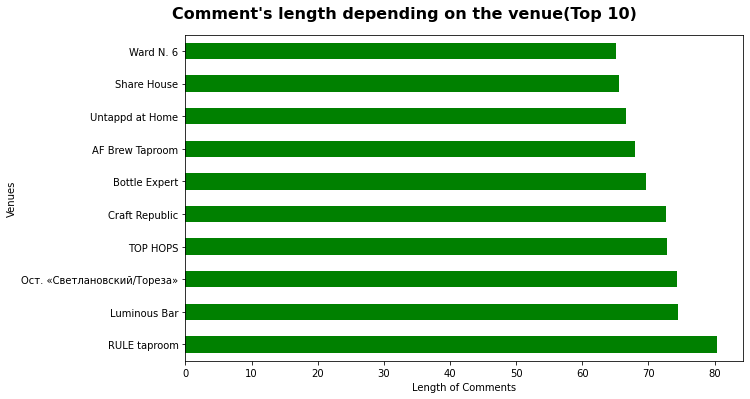

In [35]:
#места, в которых пишу самые длинные комментарии (учитываются все чекины; количество чекинов на бар больше 15)

checkins['comment_lenght'] = checkins['comment'].str.len()

avg_venue_ch_len = checkins.groupby('venue_name')['comment_lenght']
comment_hist = avg_venue_ch_len.mean()[(avg_venue_ch_len.size() >= 15)].sort_values(axis=0, ascending=False).head(10)

comment_hist.plot(kind = 'barh', figsize=[10,6], color = 'green')
plt.xlabel('Length of Comments')
plt.ylabel('Venues')
plt.text(x = -2, y= 10, s="Comment's length depending on the venue(Top 10)", size = 16, weight='bold')
plt.show()

#### #Сколько мне ещё хочется зачекинить

Этот счётчик добавлен вне системы. При помощи него я вижу, сколько чекинов ещё хотел бы сделать.

Последним и главным интересом для меня обладает желание попробовать не менее десяти сортов для каждого стиля. Желание граничит на границе искусственного и знакового. С одной стороны, это просто вымысел, последняя привязка для того, чтобы закончить с хобби "набивания статистики на вредных привычках", с другой - возможность увереннее себя чувствовать в спорах, обладая "знанием", ориентированным на кругозор. В общем-то, все интересы существуют только для того, чтобы кругозор был необъятен.

In [36]:
#сколько не хватает сортов для того, чтобы каждый стиль был попробован не менее 10 раз (quan = 2 отсутствующих стиля, умноженные на 10 проб)

style_dict = checkins_drop['beer_type'].value_counts().to_dict()
quan = 20

for each in style_dict:
    if style_dict[each] < 10:
        d = 10 - style_dict[each]
        quan += d

print('I need to check ' + str(quan) + ' beers')

I need to check 512 beers


#### #Гайд по временным промежуткам

Конечно же, как можно обойти стороной зависимость чекинов от времени! Эти закономерности - одни из самых востребованных в анализе любого процесса. 

Очень легко понять, где на графике пятница, а где отпуск. Если бы фестивали не проводились так часто и были бы строго по графику, заметили бы и их.

Вычислим самые активные года, месяца, дни, а также посмотрим, есть ли среди графиков зарождение параболы. В этом блоке учитываются все чекины, с учётом дублирующихся.

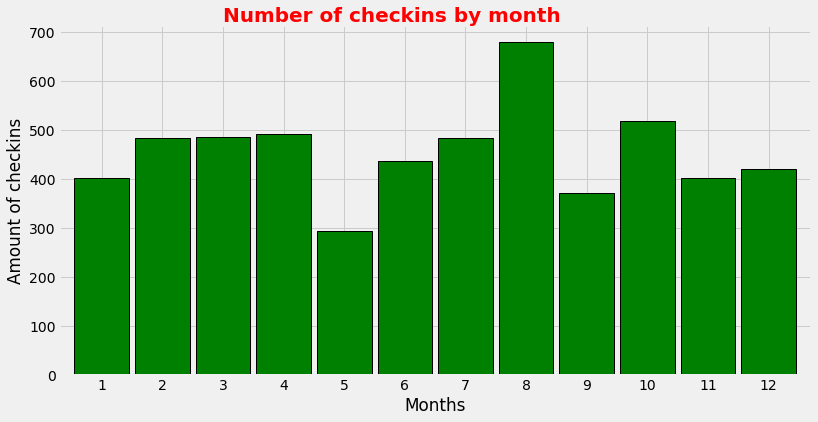

In [38]:
#количество чекинов за всё время, разбитое по месяцам

checkins['check_month'] = checkins['created_at'].dt.month
style.use('fivethirtyeight')
checkins['check_month'].value_counts().sort_index().plot(kind='bar', figsize=[12,6], width=0.9, color = 'green', edgecolor='black', linewidth=1)
plt.xlabel('Months')
plt.ylabel('Amount of cheсkins')
plt.xticks(rotation=360)
plt.text(x = 2, y= 720, s="Number of checkins by month", size = 20, weight='bold', color='red')
plt.show()

In [39]:
#количество чекинов, разбитое по годам
checkins['check_year'] = checkins['created_at'].dt.year
checkins['check_year'].value_counts()

2020    1470
2019    1397
2021    1146
2017     584
2018     457
2016     349
2015      66
Name: check_year, dtype: int64

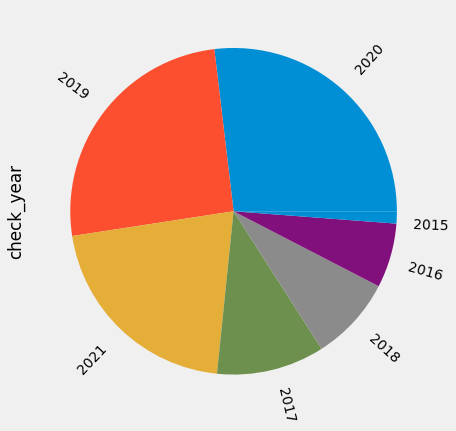

In [40]:
checkins['check_year'].value_counts().plot(kind='pie', figsize=[12,7], rotatelabels=True)

plt.show()

In [41]:
#распределение чекинов по месяцам за 2021 год

checkins[checkins['check_year'] == 2021]['check_month'].value_counts()

6     137
1     133
4     120
7     117
2     112
8     100
11    100
5      93
12     75
3      64
10     61
9      34
Name: check_month, dtype: int64

In [42]:
#распределение чекинов по дням за 2021 год

checkins[checkins['check_year'] == 2021]['weekdays'].value_counts()

4    352
5    241
6    118
0    117
2    107
1    106
3    105
Name: weekdays, dtype: int64

<AxesSubplot:xlabel='weekdays', ylabel='rating_score'>

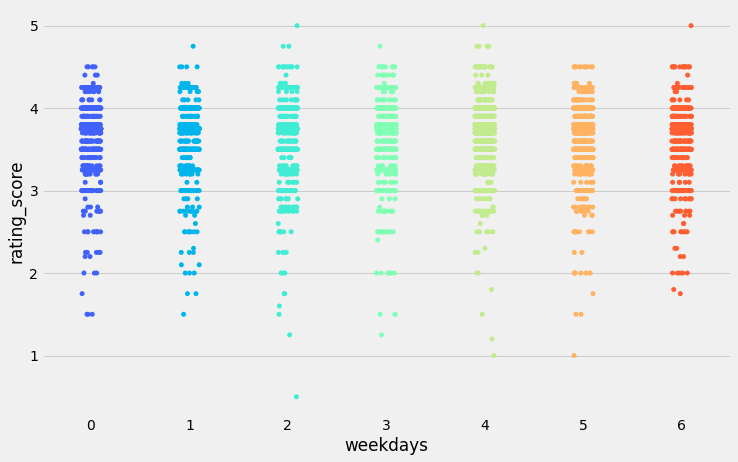

In [43]:
#оценки чекинов по дням за 2021 год

plt.figure(figsize=(11, 7)), 
sns.stripplot(x='weekdays', y='rating_score',data=checkins, palette='rainbow')

<AxesSubplot:xlabel='check_year', ylabel='serving_type'>

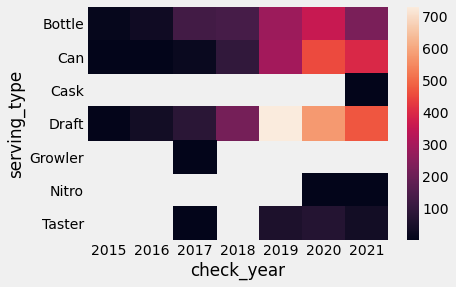

In [44]:
#тепловая карта для разных типов потребления

heatdata_serving = pd.pivot_table(checkins, values='beer_name', index='serving_type', columns='check_year', aggfunc='count')
sns.heatmap(heatdata_serving)

<AxesSubplot:xlabel='check_month', ylabel='check_year'>

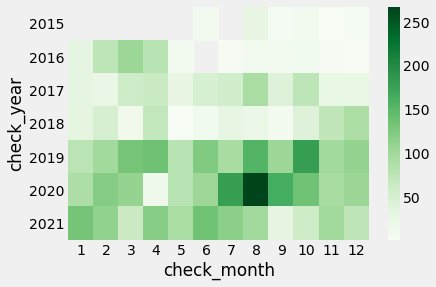

In [45]:
#тепловая карта для чекинов по годам и месяцам (отлично видны фестивали)

heatdata_serving = pd.pivot_table(checkins, values='beer_name', index='check_year', columns='check_month', aggfunc='count')
sns.heatmap(heatdata_serving, cmap='Greens')

In [46]:
#создаём сводную табличку количества чекинов по времени в зависимости от дня недели

checkins['check_hour'] = checkins['created_at'].dt.hour
ppop = pd.pivot_table(checkins, values='beer_name', index='weekdays', columns='check_hour', aggfunc='count')
ppop

check_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekdays,,,,,,,,,,,,,,,,,,,,,
0,11.0,2.0,1.0,NaN,1.0,NaN,NaN,4.0,21.0,1.0,...,16.0,38.0,59.0,114.0,135.0,79.0,68.0,40.0,40.0,13.0
1,10.0,5.0,6.0,2.0,6.0,1.0,NaN,9.0,4.0,4.0,...,4.0,17.0,53.0,84.0,104.0,84.0,72.0,65.0,41.0,23.0
2,23.0,11.0,1.0,11.0,5.0,NaN,NaN,4.0,4.0,13.0,...,11.0,24.0,56.0,87.0,99.0,93.0,61.0,49.0,57.0,37.0
3,19.0,2.0,2.0,5.0,NaN,NaN,NaN,5.0,10.0,8.0,...,23.0,46.0,55.0,99.0,130.0,109.0,71.0,48.0,43.0,45.0
4,22.0,4.0,NaN,1.0,1.0,NaN,1.0,18.0,11.0,3.0,...,18.0,48.0,139.0,163.0,144.0,154.0,155.0,132.0,85.0,70.0
5,58.0,26.0,18.0,2.0,1.0,NaN,1.0,5.0,2.0,23.0,...,48.0,66.0,76.0,100.0,80.0,71.0,81.0,60.0,70.0,45.0
6,35.0,29.0,10.0,10.0,10.0,NaN,NaN,3.0,21.0,35.0,...,29.0,26.0,34.0,47.0,53.0,48.0,45.0,28.0,21.0,18.0


In [47]:
# импортируем код со stackoverflow.com (нужно в нём когда-нибудь разобраться)

import matplotlib.cm as cm
import matplotlib as mpl

def pie_heatmap(table, cmap=cm.gnuplot, vmin=None, vmax=None,inner_r=0.25, pie_args={}):
    n, m = table.shape
    vmin= table.min().min() if vmin is None else vmin
    vmax= table.max().max() if vmax is None else vmax

    centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
    plt.gcf().gca().add_artist(centre_circle)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)
    for i, (row_name, row) in enumerate(table.iterrows()):
        labels = None if i > 0 else table.columns
        wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values], 
            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)
        wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
        plt.setp(wedges[0], edgecolor='white',linewidth=1.5)

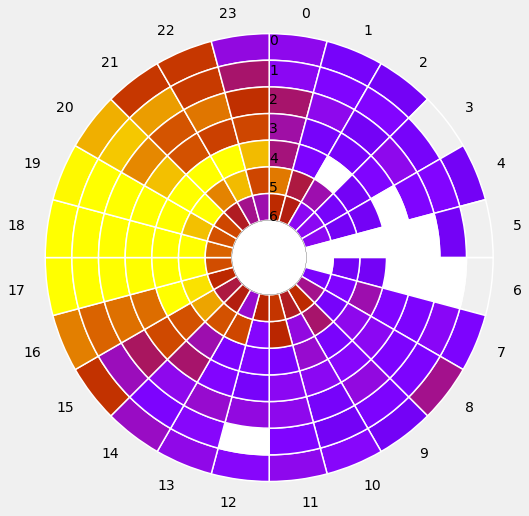

In [48]:
#строим тепловую карту в завимисости от времени потребления 

plt.figure(figsize=(8,8))
pie_heatmap(ppop, vmin=-20,vmax=80,inner_r=0.2)

plt.show()

In [49]:
#сколько дней требовалось на каждую тысячу чекинов

check = [0, 999, 1999, 2999, 3999, 4999]
days = []
for i in range(1,len(check)):
    x = check[i] - check[i-1]
    sum = checkins_drop.iloc[check[i]]['created_at'] - checkins_drop.iloc[check[i-1]]['created_at']
    sum = sum.days
    days.append(sum)

print(days)

[957, 510, 263, 241, 289]


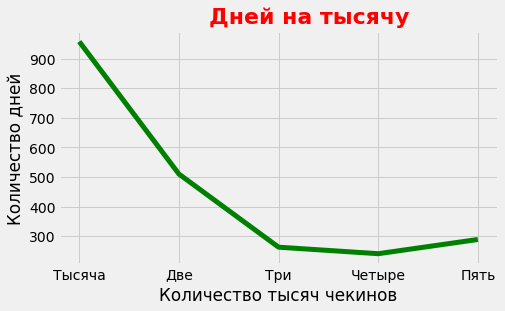

In [50]:
a = ["Тысяча", "Две", "Три", "Четыре", "Пять"]

plt.figure(figsize=[7,4])
plt.plot(a, days, color='green', linewidth = 5)
style.use('fivethirtyeight')
plt.xlabel("Количество тысяч чекинов")
plt.ylabel("Количество дней")
plt.text(x = 1.3, y= 1020, s="Дней на тысячу", size = 22, weight='bold', color='red')
plt.show()

Исходя из вышерасположенных графиков заметно, что за последние три года количество попробованных сортов выросло примерно в два раза. 
Пик пришёлся на ***2020 год***, в котором количество чекинов стремительно пересекло отметки в 3000 и 4000 тысячи, где был проведён фестивально-отпускной ***август*** с более чем 200 чекинами за месяц. 

Кроме того, ***август*** является самым активным месяцем по количеству чекинов. Причины всё те же - период отпусков, долгих прогулок по городу, встреч и фестивалей.

#### #Немного о социализации

Или о тех, без кого этой статистики бы не было. Друзья, с которыми чаще всего разделяются чекины. Люди, из-за которых зачастую их так много.

Найдём только один показатель - количество вместе попробованного пива.

In [51]:
#люди, с которыми я попробовал больше всего сортов

notnull = checkins.copy()['tagged_friends'].dropna()
notnull.value_counts(dropna=False)

Jesse Gray                                                                                       185
Petr M2FIVE                                                                                       94
Дядя Вася                                                                                         57
Jesse Gray,reijii Sakurai                                                                         52
Viktor Shrek                                                                                      35
                                                                                                ... 
July K,Petr M2FIVE,Eugene Acid                                                                     1
SULYA,Darth Vader,Beer Addicts,Super Man,Eugene Acid,Aleksey Shitikov,Alexandr O'Lenin,Мухтар      1
Jesse Gray,July K,Егор Ющенко                                                                      1
Darth Vader,SULYA,Eugene Acid                                                              

In [52]:
#оформляем всех друзей из чекинов в словарь, считаем количество уникальных значений

friends = notnull.apply(lambda x: x.split(',')).to_dict()
friends_count={}

for k,item in friends.items():
    for i in item:
        if i in friends_count:
            friends_count[i] += 1
        else:
            friends_count[i] = 1
print(friends_count)

{'Tatiana Karmanova': 4, 'Beer Addicts': 29, 'Darth Vader': 45, 'Eugene Acid': 61, 'Super Man': 5, 'SULYA': 46, 'July K': 95, 'Jesse Gray': 455, 'Дядя Вася': 73, 'Petr M2FIVE': 127, 'Aleksey Shitikov': 3, "Alexandr O'Lenin": 6, 'Мухтар': 2, 'Nof Nof': 2, 'Jeki Admiral  Foweq': 11, 'Anna R': 19, 'Dima Solntsev': 7, 'Nikita Zheleznov': 62, 'Violletta P': 70, 'Hans Jerkov': 10, 'Егор Ющенко': 48, 'Pavel Lebowski': 12, 'Daniil Korolkov': 2, 'Ksenia': 33, 'rOPbIHbI4': 27, 'Alexander Kolchin': 5, 'Golovin Pavel': 3, 'Erkki Ammalainen': 20, 'Вениамин Вкуснямба': 1, 'reijii Sakurai': 121, 'Andrey Andreev': 52, 'Viktor Shrek': 43, 'Roman K': 5, 'Marat Settarov': 3, 'Kirill Tychuk': 8, 'Evgeny Kataev': 35, 'Kirill Burgardt': 14, 'Daniel Pertsovsky': 4, 'White Dwarf': 13, 'Sergey Solovyev': 2, 'O Sh': 2, 'Tony White': 1, 'Max Dmitriev': 3, 'Niki Shmiki': 13, 'Jura Khil': 6, 'Любава Ефремова': 11, 'Kirill Polyak': 2, 'Aleksey Fadeenko': 1, 'Ivan Komarov': 3, 'Нина': 1, 'Karina Gorskova': 1, 'Vikto

In [53]:
#выбираем друзей, с которыми количество совместных чекинов превышает 50

friends_count_50 = {}

for k,i in friends_count.items():
    if i > 50:
        friends_count_50[k] = i
    
print(friends_count_50)

{'Eugene Acid': 61, 'July K': 95, 'Jesse Gray': 455, 'Дядя Вася': 73, 'Petr M2FIVE': 127, 'Nikita Zheleznov': 62, 'Violletta P': 70, 'reijii Sakurai': 121, 'Andrey Andreev': 52}


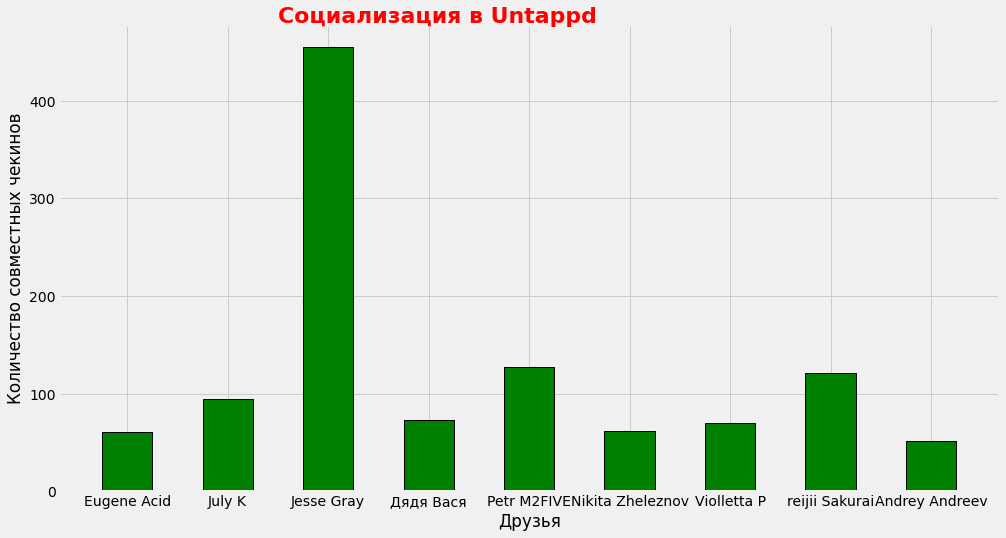

In [54]:
#строим график "социализации"

plt.figure(figsize=[15,8])
plt.bar(friends_count_50.keys(), friends_count_50.values(), width=0.5, color='green', edgecolor='black', linewidth=1)
style.use('fivethirtyeight')
plt.xlabel("Друзья")
plt.ylabel("Количество совместных чекинов")
plt.text(x = 1.5, y= 480, s="Социализация в Untappd", size = 22, weight='bold', color='red')
plt.show()

## 4.Заключение

Что можно вычленить из данного проекта?

Если рассматривать его серьёзно и для "потомков", то ничего.
Если смотреть на него "невооружённым глазом", то можно найти тренажёр, развлечение и попытку самоанализа. 

Можем ли мы оперировать имеющимися данными? Почему нет?

Например, увидеть куда движется крафтовая индустрия на примере большого количества "саур" и "смузи" сортов. Или же посмотреть, как ведёт себя человек увлечённый, как его втягивает в себя социальная сеть и очередной пример "маленького мира" в мире большом. 
И вообще, как и чем может быть инетересна такая наука, как статистика, и как красиво выглядят числа.

Особенно, когда их силуэт расплывается в отблеске пустого стекла.

## 5. Проверка статистических гипотез (в процессе)

В данном разделе проводится постепенная проверка собственных знаний и испытание действий по проверке статистических гипотез. На данный момент проведены: 

- ти-тест, в котором проверена гипотеза об однородности выставления оценок российским и американским сортам;
- anova, в котором рассмотрено влияние производителя на выставление оценки сорту пива.

Однако данные результаты являются лишь мгновенным применением имеющихся формул. В дальнейшем будет необходимо попробовать такие процессы, как проверка на нормальность, изменение объёма выборок, поправки Бонфирони и Тьюки, непараметрику для т-распределений.

In [55]:
#импорт

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal

### Критерий Стьюдента

Различаются ли между собой средние выборок генеральной совокупности всех оценок чекинов, если они сделаны для пива из разных (с некоторых точек зрения - "конкурирующих") стран.

H0 - средние значения для сортов из России и США не различаются;

alpha - уровень значимости - 0.05

In [56]:
#создаём выборки по 25 чекинов для российского и американского пива

data_usa = checkins_drop_notnan[checkins_drop_notnan['brewery_country'] == 'United States'].sample(30)
data_rus = checkins_drop_notnan[checkins_drop_notnan['brewery_country'] == 'Russia'].sample(30)
np.random.seed

<function RandomState.seed>

In [57]:
#проверяем значения, попавшие в выборки

data_usa['rating_score'].value_counts(dropna=False)

4.00    9
4.25    5
3.75    5
3.50    3
3.90    2
3.25    1
4.50    1
2.75    1
3.80    1
4.30    1
3.00    1
Name: rating_score, dtype: int64

In [58]:
data_rus['rating_score'].value_counts(dropna=False)

3.70    6
3.75    5
4.00    5
3.50    3
3.80    3
3.60    2
2.50    1
3.90    1
3.00    1
4.25    1
3.40    1
2.75    1
Name: rating_score, dtype: int64

In [59]:
#используем scipy.stats для вывода значения статистики и уровня значимости

stat, p = ttest_ind(data_usa['rating_score'], data_rus['rating_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2.078, p=0.042


In [60]:
#решаем, принять или отклонить нулевую гипотезу

alpha = 0.05
if p > alpha:
	print('Распределения одинаковы (мы не можем отклонить H0)')
else:
	print('Распределения различаются (отклоняем H0)')

Распределения различаются (отклоняем H0)


Для последующего анализа необходимо провести проверку на нормальность распределений.

### Дисперсионный анализ 

Очередь для дисперсионного анализа. Для него сделаем выборки из чекинов, отсортированных по пивоварням. В анализе будут участовать пять наиболее известных российских крафтовых пивоварен. 

Задание: Используя анализ однофакторной модели, проверим гипотезу о влиянии производителя на оценку качества продукции.

Н0 - средние каждой выборки не отличаются

alpha - уровень значимости - 0.05

In [61]:
#создаём выборки оценок для различных пивоварен (по 30 чекинов) 

data_af = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'AF Brew'].sample(25)
data_stamm = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'Stamm Brewing'].sample(25)
data_zagovor = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'Zagovor Brewery'].sample(25)
data_village = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'Big Village Brewery'].sample(25)
data_dieta = checkins_drop_notnan[checkins_drop_notnan['brewery_name'] == 'DIETA / ДИЕТА'].sample(25)
np.random.seed

<function RandomState.seed>

In [62]:
#считаем статистику и p_value

stats, p2 = f_oneway(data_af['global_weighted_rating_score'], data_stamm['global_weighted_rating_score'], data_zagovor['global_weighted_rating_score'], data_village['global_weighted_rating_score'], data_dieta['global_weighted_rating_score'])
print('Statistics=%.3f, p=%.3f' % (stats, p2))

Statistics=1.549, p=0.193


In [63]:
#решаем, принять или отклонить нулевую гипотезу

alpha = 0.05
if p2 > alpha:
	print('Распределения одинаковы (мы не можем отклонить H0)')
else:
	print('Распределения различаются (отклоняем H0)')

Распределения одинаковы (мы не можем отклонить H0)


Проверяем те же выборки при помощи непараметрического подхода - Критерия Краскелла-Уоллеса

In [64]:
stat, p = kruskal(data_af['global_weighted_rating_score'], data_stamm['global_weighted_rating_score'], data_zagovor['global_weighted_rating_score'], data_village['global_weighted_rating_score'], data_dieta['global_weighted_rating_score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=6.164, p=0.187


In [65]:
#решаем, принять или отклонить нулевую гипотезу

alpha = 0.05
if p > alpha:
	print('Распределения одинаковы (мы не можем отклонить H0)')
else:
	print('Распределения различаются (отклоняем H0)')

Распределения одинаковы (мы не можем отклонить H0)


Результаты однофакторного ANOVA и критерия Краскелла-Уоллеса совпадают.

Однако достоверность эксперимента следует проверить на разных количествах оценок, попадающих в выборку, а также на различных выборках. Также следует использовать такие инструменты, как поправка Бонфирони или критерий Тьюки.

### Корреляция и линейная регрессия

In [66]:
#проверяем наличие корреляции между двумя величинами - собственной оценкой сортов и оценкой сообщества

checkins_drop_notnan['rating_score'].corr(checkins_drop_notnan['global_weighted_rating_score'])

0.6153916703980722

#      Продолжение следует...